In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

def merge_aero_data(alpha_cl_file, cm_alpha_file, cl_cd_file):

    FILE_FOLDER = 'abbott_data/'

    alpha_cl_df = pd.read_csv(FILE_FOLDER+alpha_cl_file, sep=';', dtype=str)
    cl_cd_df = pd.read_csv(FILE_FOLDER+cl_cd_file, sep=';', dtype=str)

    alpha_cl_df.columns = ['Alpha', 'Cl']
    cl_cd_df.columns = ['Cl', 'Cd']

    for df in [alpha_cl_df, cl_cd_df]:
        df.replace(',', '.', regex=True, inplace=True)
        for col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    alpha_cl_df = alpha_cl_df.sort_values(by='Alpha')
    cl_cd_df['Alpha'] = np.interp(cl_cd_df['Cl'], alpha_cl_df['Cl'], alpha_cl_df['Alpha'])
    merged_df = pd.merge(alpha_cl_df, cl_cd_df, on='Cl', how='outer')

    if 'Alpha_x' in merged_df.columns and 'Alpha_y' in merged_df.columns:
        merged_df['Alpha'] = merged_df['Alpha_x'].combine_first(merged_df['Alpha_y'])
        merged_df.drop(columns=['Alpha_x', 'Alpha_y'], inplace=True)  # Remover colunas extras

    merged_df = merged_df.sort_values(by=['Alpha', 'Cl'])

    # Resetar índice
    merged_df.reset_index(drop=True, inplace=True)

    return merged_df

# Exemplo de uso
# df_final = merge_aero_data('alpha_cl.csv', 'cl_cd.csv')
# print(df_final)

# Exemplo de uso
df = merge_aero_data('naca63206_cl_3000000.csv', 'naca63206_cm_3000000.csv', 'naca63206_cd_3000000.csv')
print(df.head())

         Cl        Cd     Alpha
0 -0.371543       NaN -5.483362
1 -0.302306       NaN -4.791767
2 -0.218371       NaN -4.100172
3 -0.208077  0.006228 -3.997352
4 -0.173501  0.005984 -3.651981


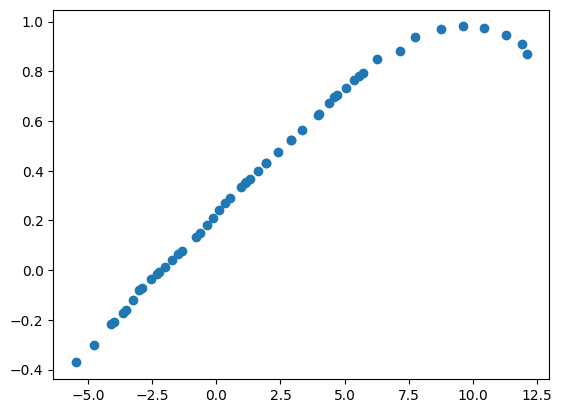

In [2]:
import matplotlib.pyplot as plt

plt.scatter(df.Alpha, df.Cl)

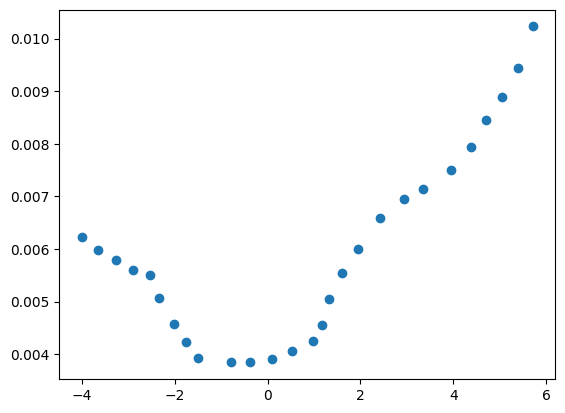

In [3]:
plt.scatter(df.Alpha, df.Cd)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cl      52 non-null     float64
 1   Cd      27 non-null     float64
 2   Alpha   52 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


In [5]:
nome_arquivo='naca0006_cl_3000000.csv'
informacoes = nome_arquivo.replace('.csv', '').split('_')

# Suponha que as informações no nome sejam:
# [nome, aerofolio, coediciente, Reynolds]

# Adicionando as informações como novas colunas no DataFrame
df['airfoil'] = informacoes[0]
df['coediciente'] = informacoes[1]
df['Re'] = informacoes[2]

In [6]:
df

,Cl,Cd,Alpha,airfoil,coediciente,Re
0,-0.371543,NaN,-5.483362,naca0006,cl,3000000
1,-0.302306,NaN,-4.791767,naca0006,cl,3000000
2,-0.218371,NaN,-4.100172,naca0006,cl,3000000
3,-0.208077,0.006228,-3.997352,naca0006,cl,3000000
4,-0.173501,0.005984,-3.651981,naca0006,cl,3000000
5,-0.159025,NaN,-3.507376,naca0006,cl,3000000
6,-0.119285,0.005792,-3.258409,naca0006,cl,3000000
7,-0.080174,NaN,-3.013379,naca0006,cl,3000000
8,-0.069986,0.005600,-2.904904,naca0006,cl,3000000
9,-0.035502,0.005505,-2.537708,naca0006,cl,3000000


In [42]:
import pandas as pd
import os

def merge_aero_data(airfoil, Re):

    # Construir os nomes dos arquivos
    cl_alpha_file = f'{airfoil}_cl_{Re}.csv'
    cm_alpha_file = f'{airfoil}_cm_{Re}.csv'
    cd_cl_file = f'{airfoil}_cd_{Re}.csv'

    FILE_FOLDER = 'abbott_data/'

    # Função para ler o arquivo se existir
    def read_file(file_name):
        file_path = os.path.join(FILE_FOLDER, file_name)
        if os.path.exists(file_path):
            return pd.read_csv(file_path, sep=';')
        else:
            return pd.DataFrame()  # Retorna um DataFrame vazio se o arquivo não existir

    # Ler os arquivos CSV, ou DataFrames vazios se não existirem
    cl_alpha_df = read_file(cl_alpha_file)
    cm_alpha_df = read_file(cm_alpha_file)
    cd_cl_df = read_file(cd_cl_file)

    # Garantir que os arquivos lidos (se existirem) tenham as colunas corretas
    if not cl_alpha_df.empty:
        cl_alpha_df.columns = ['Alpha', 'Cl']
    if not cm_alpha_df.empty:
        cm_alpha_df.columns = ['Alpha', 'Cm']
    if not cd_cl_df.empty:
        cd_cl_df.columns = ['Cl', 'Cd']

    for df in [cl_alpha_df, cd_cl_df]:
        df.replace(',', '.', regex=True, inplace=True)
        for col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    cl_alpha_df = cl_alpha_df.sort_values(by='Alpha')
    cd_cl_df['Alpha'] = np.interp(cd_cl_df['Cl'], cl_alpha_df['Cl'], cl_alpha_df['Alpha'])

    merged_df = pd.DataFrame()
    merged_df = pd.merge(cl_alpha_df, cd_cl_df, on='Cl', how='outer')

    if 'Alpha_x' in merged_df.columns and 'Alpha_y' in merged_df.columns:
        merged_df['Alpha'] = merged_df['Alpha_x'].combine_first(merged_df['Alpha_y'])
        merged_df.drop(columns=['Alpha_x', 'Alpha_y'], inplace=True)  # Remover colunas extras

    merged_df = merged_df.sort_values(by=['Alpha', 'Cl'])

    # Resetar índice
    merged_df.reset_index(drop=True, inplace=True)

    return merged_df

# Exemplo de uso
df = merge_aero_data('naca0006', 3000000)
print(df.head())

         Cl        Cd     Alpha
0 -0.741325       NaN -6.147001
1 -0.694416       NaN -6.000083
2 -0.686933  0.008739 -5.989928
3 -0.652975  0.008439 -5.943840
4 -0.640290       NaN -5.926625


In [43]:
import os

# Caminho para a pasta onde os arquivos estão
caminho_pasta = "abbott_data/"

# Filtrar apenas os arquivos CSV
arquivos_csv = [arquivo for arquivo in os.listdir(caminho_pasta) if arquivo.endswith('.csv')]

# Exibir a lista de arquivos CSV
print(arquivos_csv)

['naca0006_cd_3000000.csv', 'naca0006_cd_6000000.csv', 'naca0006_cd_9000000.csv', 'naca0006_cl_3000000.csv', 'naca0006_cl_6000000.csv', 'naca0006_cl_9000000.csv', 'naca0006_cm_3000000.csv', 'naca0006_cm_6000000.csv', 'naca0006_cm_9000000.csv', 'naca0009_cd_3000000.csv', 'naca0009_cd_6000000.csv', 'naca0009_cd_9000000.csv', 'naca0009_cl_3000000.csv', 'naca0009_cl_6000000.csv', 'naca0009_cl_9000000.csv', 'naca0009_cm_3000000.csv', 'naca0009_cm_6000000.csv', 'naca0009_cm_9000000.csv', 'naca001034a08_cd_3000000.csv', 'naca001034a08_cd_6000000.csv', 'naca001034a08_cd_9000000.csv', 'naca001034a08_cl_3000000.csv', 'naca001034a08_cl_6000000.csv', 'naca001034a08_cl_9000000.csv', 'naca001034a08_cm_3000000.csv', 'naca001034a08_cm_6000000.csv', 'naca001034a08_cm_9000000.csv', 'naca001034_cd_3100000.csv', 'naca001034_cd_6000000.csv', 'naca001034_cd_9000000.csv', 'naca001034_cl_3100000.csv', 'naca001034_cl_6000000.csv', 'naca001034_cl_9000000.csv', 'naca001034_cm_3100000.csv', 'naca001034_cm_6000000

In [44]:
# Inicializando listas (ou conjuntos) para armazenar os valores únicos
airfoils = set(); coedicientes = set(); Reynolds = set()

# Iterando sobre a lista de arquivos
for nome_arquivo in arquivos_csv:
    # Extraindo as informações do nome do arquivo
    informacoes = nome_arquivo.replace('.csv', '').split('_')
    
    # Adicionando as informações únicas aos conjuntos
    airfoils.add(informacoes[0])  # Nome do aerofólio
    coedicientes.add(informacoes[1])  # Coeficiente
    Reynolds.add(informacoes[2])  # Reynolds

# Convertendo os conjuntos para listas, se preferir trabalhar com listas
airfoils = list(airfoils)
coedicientes = list(coedicientes)
Reynolds = list(Reynolds)

# Mostrando as listas e o DataFrame resultante
print("Airfoils únicos:", airfoils)
print("Quantidade de Airfoils:", len(airfoils))
print("Coeficientes únicos:", coedicientes)
print("Reynolds únicos:", Reynolds)

Airfoils únicos: ['naca1410', 'naca2410', 'naca4421', 'naca63209', 'naca632015', 'naca2412', 'naca631212', 'naca631012', 'naca63006', 'naca1408', 'naca4412', 'naca001034a08', 'naca631412', 'naca4415', 'naca001034', 'naca23018', 'naca0012', 'naca001035', 'naca63210', 'naca632615', 'naca0009', 'naca1412', 'naca23015', 'naca2415', 'naca4424', 'naca0006', 'naca001264', 'naca4418', 'naca2418', 'naca2421', 'naca23024', 'naca63009', 'naca001264a08', 'naca632415', 'naca63206', 'naca2408', 'naca23012', 'naca2424', 'naca632215', 'naca23021']
Quantidade de Airfoils: 40
Coeficientes únicos: ['cd', 'cm', 'cl']
Reynolds únicos: ['3000000', '8800000', '6000000', '5700000', '8900000', '5900000', '2900000', '5800000', '9000000', '2600000', '3100000']


In [45]:
# Inicializando listas (ou conjuntos) para armazenar os valores únicos
airfoils = set(); Reynolds = set()
# Iterando sobre a lista de arquivos
for nome_arquivo in arquivos_csv:
    # Extraindo as informações do nome do arquivo
    informacoes = nome_arquivo.replace('.csv', '').split('_')
    
    # Adicionando as informações únicas aos conjuntos
    airfoils.add(informacoes[0])  # Nome do aerofólio
    Reynolds.add(informacoes[2])  # Reynolds

# Convertendo os conjuntos para listas, se preferir trabalhar com listas
airfoils = list(airfoils)
Reynolds = list(Reynolds)

# Inicializando um DataFrame vazio
final_df = pd.DataFrame()

# Percorrendo todas as combinações de aerofólio e Reynolds
for airfoil in airfoils:
    for Re in Reynolds:
        try:
            # Chama a função merge_aero_data para cada combinação
            merged_df = pd.DataFrame()
            merged_df = merge_aero_data(airfoil, Re)
            
            # Adicionar uma coluna para identificar o aerofólio e o Reynolds no DataFrame
            merged_df['airfoil'] = airfoil
            merged_df['Re'] = Re
            
            # Concatenar o DataFrame resultante diretamente ao final_df
            final_df = pd.concat([final_df, merged_df], ignore_index=True)
            
        except Exception as e:
            # Em caso de erro (por exemplo, arquivo não encontrado), pode-se simplesmente continuar
            print(f"Erro ao processar {airfoil} para Re={Re}: {e}")
            continue

Erro ao processar naca1410 para Re=8800000: 'Alpha'
Erro ao processar naca1410 para Re=5700000: 'Alpha'
Erro ao processar naca1410 para Re=8900000: 'Alpha'
Erro ao processar naca1410 para Re=5900000: 'Alpha'
Erro ao processar naca1410 para Re=2900000: 'Alpha'
Erro ao processar naca1410 para Re=5800000: 'Alpha'
Erro ao processar naca1410 para Re=2600000: 'Alpha'
Erro ao processar naca1410 para Re=3100000: 'Alpha'
Erro ao processar naca2410 para Re=8800000: 'Alpha'
Erro ao processar naca2410 para Re=5700000: 'Alpha'
Erro ao processar naca2410 para Re=8900000: 'Alpha'
Erro ao processar naca2410 para Re=5900000: 'Alpha'
Erro ao processar naca2410 para Re=2900000: 'Alpha'
Erro ao processar naca2410 para Re=5800000: 'Alpha'
Erro ao processar naca2410 para Re=2600000: 'Alpha'
Erro ao processar naca2410 para Re=3100000: 'Alpha'
Erro ao processar naca4421 para Re=8800000: 'Alpha'
Erro ao processar naca4421 para Re=5700000: 'Alpha'
Erro ao processar naca4421 para Re=8900000: 'Alpha'
Erro ao proc

In [46]:
final_df

,Cl,Cd,Alpha,airfoil,Re
0,-1.121109,0.015669,-9.804158,naca1410,3000000
1,-1.092091,0.015091,-9.804158,naca1410,3000000
2,-1.080654,0.014569,-9.804158,naca1410,3000000
3,-1.057541,0.013933,-9.804158,naca1410,3000000
4,-1.028489,0.013412,-9.804158,naca1410,3000000
...,...,...,...,...,...
10194,1.356408,0.018187,20.833581,naca23021,5900000
10195,1.392475,0.019042,20.833581,naca23021,5900000
10196,1.422932,0.020112,20.833581,naca23021,5900000
10197,1.447378,0.021040,20.833581,naca23021,5900000


In [12]:
import os
import difflib

# Caminhos das pastas
pasta_coeficientes = 'abbott_data/'
pasta_coordenadas = 'airfoils_coords/'

# Listar os arquivos em ambas as pastas
arquivos_coeficientes = os.listdir(pasta_coeficientes)
arquivos_coordenadas = os.listdir(pasta_coordenadas)

# Função para extrair o nome do aerofólio do nome do arquivo (removendo extensões)
def extrair_nome_aerofolio(nome_arquivo):
    return nome_arquivo.rsplit('.', 1)[0].split('_')[0]  # Remove extensão e pega a primeira parte do nome

# Criar um dicionário de correspondências e um conjunto de arquivos já atribuídos
mapeamento = {}
notas_correspondencia = {}  # Dicionário para armazenar as notas
arquivos_disponiveis = set(arquivos_coordenadas)  # Lista de arquivos ainda disponíveis

# Obter apenas os nomes dos aerofólios (sem extensões) para comparação
aerofolios_coef = [extrair_nome_aerofolio(arquivo) for arquivo in arquivos_coeficientes]
aerofolios_coord = {arquivo: extrair_nome_aerofolio(arquivo) for arquivo in arquivos_coordenadas}

# Criar uma lista para armazenar todas as correspondências possíveis
correspondencias = []

# Comparar os arquivos das duas pastas e calcular a similaridade
for aerofolio_coef in aerofolios_coef:
    for arquivo_coord, nome_coord in aerofolios_coord.items():
        score = difflib.SequenceMatcher(None, aerofolio_coef, nome_coord).ratio()
        correspondencias.append((aerofolio_coef, arquivo_coord, score))

# Ordenar as correspondências da maior para a menor similaridade
correspondencias.sort(key=lambda x: x[2], reverse=True)

# Atribuir as melhores correspondências, garantindo que cada arquivo seja usado apenas uma vez
for aerofolio_coef, arquivo_coord, score in correspondencias:
    if aerofolio_coef not in mapeamento and arquivo_coord in arquivos_disponiveis:
        mapeamento[aerofolio_coef] = arquivo_coord
        notas_correspondencia[aerofolio_coef] = score  # Armazena a nota de similaridade
        arquivos_disponiveis.remove(arquivo_coord)  # Marca o arquivo como utilizado

# Se sobrar algum aerofólio sem correspondência, permitir reutilização de arquivos
for aerofolio_coef in aerofolios_coef:
    if aerofolio_coef not in mapeamento:
        melhor_correspondencia = max(correspondencias, key=lambda x: x[2] if x[0] == aerofolio_coef else -1)
        mapeamento[aerofolio_coef] = melhor_correspondencia[1]
        notas_correspondencia[aerofolio_coef] = melhor_correspondencia[2]  # Armazena a nota de similaridade

# Exibir o mapeamento final com notas
for aerofolio_coef, arquivo_coord in mapeamento.items():
    nota = notas_correspondencia[aerofolio_coef]
    print(f"O aerofólio {aerofolio_coef} dos coeficientes corresponde ao arquivo de coordenadas {arquivo_coord} (Nota: {nota:.2f})")

O aerofólio naca0006 dos coeficientes corresponde ao arquivo de coordenadas naca0006.dat (Nota: 1.00)
O aerofólio naca0009 dos coeficientes corresponde ao arquivo de coordenadas naca0009.dat (Nota: 1.00)
O aerofólio naca001034a08 dos coeficientes corresponde ao arquivo de coordenadas naca001034a08.dat (Nota: 1.00)
O aerofólio naca001034 dos coeficientes corresponde ao arquivo de coordenadas naca001034.dat (Nota: 1.00)
O aerofólio naca001035 dos coeficientes corresponde ao arquivo de coordenadas naca001035.dat (Nota: 1.00)
O aerofólio naca001264a08 dos coeficientes corresponde ao arquivo de coordenadas naca001264a08.dat (Nota: 1.00)
O aerofólio naca001264 dos coeficientes corresponde ao arquivo de coordenadas naca001264.dat (Nota: 1.00)
O aerofólio naca0012 dos coeficientes corresponde ao arquivo de coordenadas naca0012.dat (Nota: 1.00)
O aerofólio naca1408 dos coeficientes corresponde ao arquivo de coordenadas naca1408.dat (Nota: 1.00)
O aerofólio naca1410 dos coeficientes corresponde 

In [13]:
print(len(final_df.airfoil.unique()))
for i in final_df.airfoil.unique():

    if notas_correspondencia[i] < 1:
        final_df = final_df[final_df.airfoil != i]

print(len(final_df.airfoil.unique()))

40
40


In [14]:
import numpy as np

def process_airfoil_coordinates(x_l, y_l, airfoil_name):
    # Convertendo listas para arrays NumPy
    x_l = np.array(x_l, dtype=float)
    y_l = np.array(y_l, dtype=float)

    # Normalizando as coordenadas (dividindo por 100)
    x_l /= 100
    y_l /= 100

    # Criando a parte inferior (invertendo os valores de y)
    x_u = np.flip(x_l[1:])  # Espelha x, exceto o primeiro ponto (evita repetição do 0)
    y_u = np.flip(y_l[1:])  # Inverte e espelha y

    # Junta os dados para saída no formato desejado
    output = [airfoil_name]  # Primeira linha com o nome do aerofólio
    for x, y in zip(x_u, y_u):  # Parte superior do aerofólio
        output.append(f"{x:.6f} {y:.6f}")
    for x, y in zip(x_l, -y_l):  # Parte inferior do aerofólio
        output.append(f"{x:.6f} {y:.6f}")

    # Nome do arquivo baseado no nome do aerofólio
    filename = f"airfoils_coords\\{airfoil_name}.dat"

    # Salvando o arquivo .dat
    with open(filename, "w") as file:
        file.write("\n".join(output))
    
    print(f"Arquivo '{filename}' salvo com sucesso!")

# Exemplo de uso:
x_coords = [0, 0.5, 0.75, 1.25, 2.5, 5.0, 7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
y_coords = [0, 1.204, 1.462, 1.878, 2.610, 3.648, 4.427, 5.055, 6.011, 6.693, 7.155, 7.421, 7.500, 7.386, 7.099, 6.665, 6.108, 5.453, 4.721, 3.934, 3.119, 2.310, 1.541, 0.852, 0.300, 0]

process_airfoil_coordinates(x_coords, y_coords, 'naca632015')

Arquivo 'airfoils_coords\naca632015.dat' salvo com sucesso!


In [15]:
# Exemplo de uso:
x_coords = [0, 0.5, 0.75, 1.25, 2.5, 5.0, 7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
y_coords = [0, 0.503, 0.609, 0.771, 1.057, 1.462, 1.766, 2.010, 2.386, 2.656, 2.841, 2.954, 3.000, 2.971, 2.877, 2.723, 2.517, 2.267, 1.982, 1.670, 1.342, 1.008, 0.683, 0.383, 0.138, 0]

process_airfoil_coordinates(x_coords, y_coords, 'naca63006')

# Exemplo de uso:
x_coords = [0, 0.5, 0.75, 1.25, 2.5, 5.0, 7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
y_coords = [0, 0.749, 0.906, 1.151, 1.582, 2.196, 2.655, 3.024, 3.591, 3.997, 4.275, 4.442, 4.500, 4.447, 4.296, 4.056, 3.739, 3.358, 2.928, 2.458, 1.966, 1.471, 0.990, 0.550, 0.196, 0]

process_airfoil_coordinates(x_coords, y_coords, 'naca63009')

# Exemplo de uso:
x_coords = [0, 0.5, 0.75, 1.25, 2.5, 5.0, 7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
y_coords = [0, 0.985, 1.194, 1.519, 2.102, 2.925, 3.542, 4.039, 4.799, 5.342, 5.712, 5.930, 6.000, 5.920, 5.704, 5.370, 4.935, 4.420, 3.840, 3.210, 2.556, 1.902, 1.274, 0.707, 0.250, 0]

process_airfoil_coordinates(x_coords, y_coords, 'naca631012')

Arquivo 'airfoils_coords\naca63006.dat' salvo com sucesso!
Arquivo 'airfoils_coords\naca63009.dat' salvo com sucesso!
Arquivo 'airfoils_coords\naca631012.dat' salvo com sucesso!


----

In [16]:
import sys
import matplotlib.pyplot as plt
import numpy as np

# Internal Functions
sys.path.append('../')
from functions import Coord2Bezier, Bezier2Coord, comparar_superficies

import warnings
warnings.filterwarnings('ignore')

filename = pasta_coordenadas+'naca0009.dat' #enter your file path here
airfoil = pd.read_table(filename,delim_whitespace=True,skiprows=[0],names=['x','y'],index_col=False)

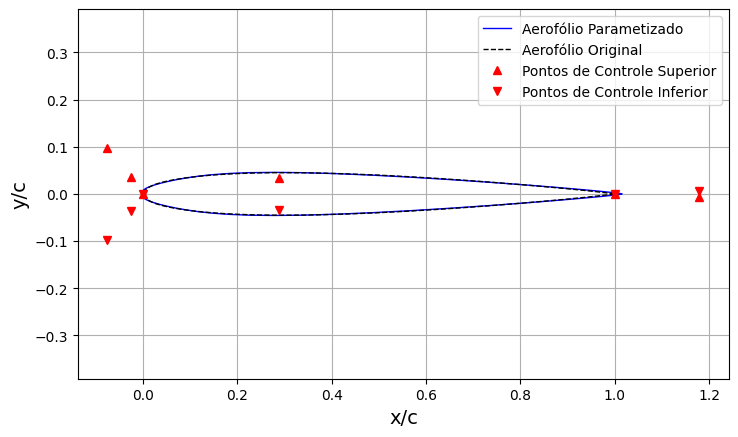

In [17]:
CP=6
xsupB,ysupB,xinfB,yinfB = Coord2Bezier(airfoil,CP)
xBezierSup, yBezierSup, xBezierInf, yBezierInf = Bezier2Coord(xsupB,ysupB,xinfB,yinfB,nPts = int(np.ceil(len(airfoil.x)/2)), dist='Cossine')

plt.figure(figsize=(8.4, 4.8))
plt.plot(xBezierSup,yBezierSup,'b-', label='Aerofólio Parametizado', linewidth=1)
plt.plot(xBezierInf,yBezierInf,'b-', linewidth=1)
plt.plot(airfoil.x, airfoil.y, 'k--', label='Aerofólio Original', linewidth=1)
plt.plot(xsupB,ysupB,'r^',label='Pontos de Controle Superior', linewidth=3)
plt.plot(xinfB,yinfB,'rv',label='Pontos de Controle Inferior', linewidth=3)
#Plot settings
font = {'size': 14}
plt.axis('equal')
plt.grid('minor')
plt.ylabel('y/c', fontdict=font)
plt.xlabel("x/c", fontdict=font)
plt.legend()
plt.show()

In [18]:
# Entradas
from math import floor
xf=np.array(airfoil.x)
yf=np.array(airfoil.y)
N=xf.shape[0]
deg = CP-1
t=np.linspace(0,1,floor((N+1)/2))
xsup = np.zeros( (floor((N+1)/2)), dtype='float')
ysup = np.zeros( (floor((N+1)/2)), dtype='float')
xinf = np.zeros( (floor((N+1)/2)), dtype='float')
yinf = np.zeros( (floor((N+1)/2)), dtype='float')

for i in np.arange(0,(N+1)/2, dtype=int):
    xsup[i]=xf[int((N+1)/2-1-i)]
    ysup[i]=yf[int((N+1)/2-1-i)]

for i in np.arange((N+1)/2-1,N, dtype=int):
    xinf[int(i-(N+1)/2+1)]=xf[i]
    yinf[int(i-(N+1)/2+1)]=yf[i]

Erro Quadrático Médio (MSE) Intradorso: 1.2494449397864808e-06
Erro Quadrático Médio (MSE) Extradorso: 1.2494449397864808e-06


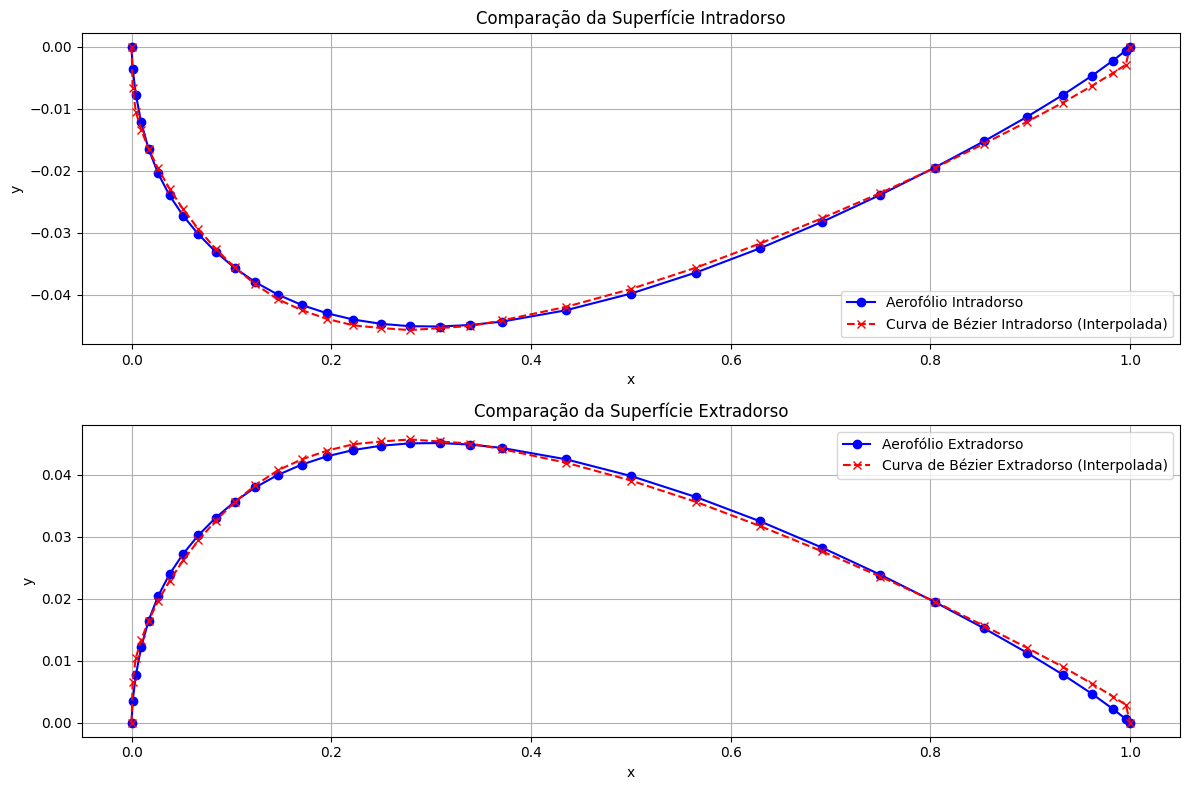

In [19]:
erro_intradorso, mse_intradorso, y_bezier_intradorso_interp = comparar_superficies(xinf, yinf, xBezierInf, yBezierInf)
erro_extradorso, mse_extradorso, y_bezier_extradorso_interp = comparar_superficies(xsup, ysup, xBezierSup, yBezierSup)
print("Erro Quadrático Médio (MSE) Intradorso:", mse_intradorso)
print("Erro Quadrático Médio (MSE) Extradorso:", mse_extradorso)

# Visualização das superfícies

plt.figure(figsize=(12, 8))

# Plotando a superfície intradorso
plt.subplot(2, 1, 1)
plt.plot(xinf, yinf, label='Aerofólio Intradorso', marker='o', linestyle='-', color='blue')
plt.plot(xinf, y_bezier_intradorso_interp, label='Curva de Bézier Intradorso (Interpolada)', marker='x', linestyle='--', color='red')
plt.title('Comparação da Superfície Intradorso')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Plotando a superfície extradorso
plt.subplot(2, 1, 2)
plt.plot(xsup, ysup, label='Aerofólio Extradorso', marker='o', linestyle='-', color='blue')
plt.plot(xsup, y_bezier_extradorso_interp, label='Curva de Bézier Extradorso (Interpolada)', marker='x', linestyle='--', color='red')
plt.title('Comparação da Superfície Extradorso')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

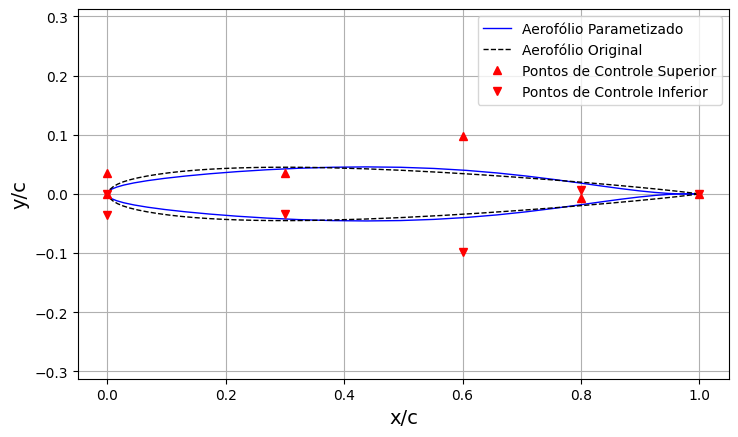

In [20]:
CP = 6

xsupB,ysupB,xinfB,yinfB = Coord2Bezier(airfoil,CP)
#xsupB = list(np.insert(np.linspace(0, 1, CP-1), 0, 0))
#xinfB = list(np.insert(np.linspace(0, 1, CP-1), 0, 0))
xsupB = [0.00, 0.00, 0.30, 0.60, 0.80, 1.0]
xinfB = [0.00, 0.00, 0.30, 0.60, 0.80, 1.0]
xBezierSup, yBezierSup, xBezierInf, yBezierInf = Bezier2Coord(xsupB,ysupB,xinfB,yinfB,nPts = int(np.ceil(len(airfoil.x)/2)), dist='Cossine')

plt.figure(figsize=(8.4, 4.8))
plt.plot(xBezierSup,yBezierSup,'b-', label='Aerofólio Parametizado', linewidth=1)
plt.plot(xBezierInf,yBezierInf,'b-', linewidth=1)
plt.plot(airfoil.x, airfoil.y, 'k--', label='Aerofólio Original', linewidth=1)
plt.plot(xsupB,ysupB,'r^',label='Pontos de Controle Superior', linewidth=3)
plt.plot(xinfB,yinfB,'rv',label='Pontos de Controle Inferior', linewidth=3)
#Plot settings
font = {'size': 14}
plt.axis('equal')
plt.grid('minor')
plt.ylabel('y/c', fontdict=font)
plt.xlabel("x/c", fontdict=font)
plt.legend()
plt.show()

Erro Quadrático Médio (MSE) Intradorso: 2.690398552154167e-05
Erro Quadrático Médio (MSE) Extradorso: 2.690398552154167e-05


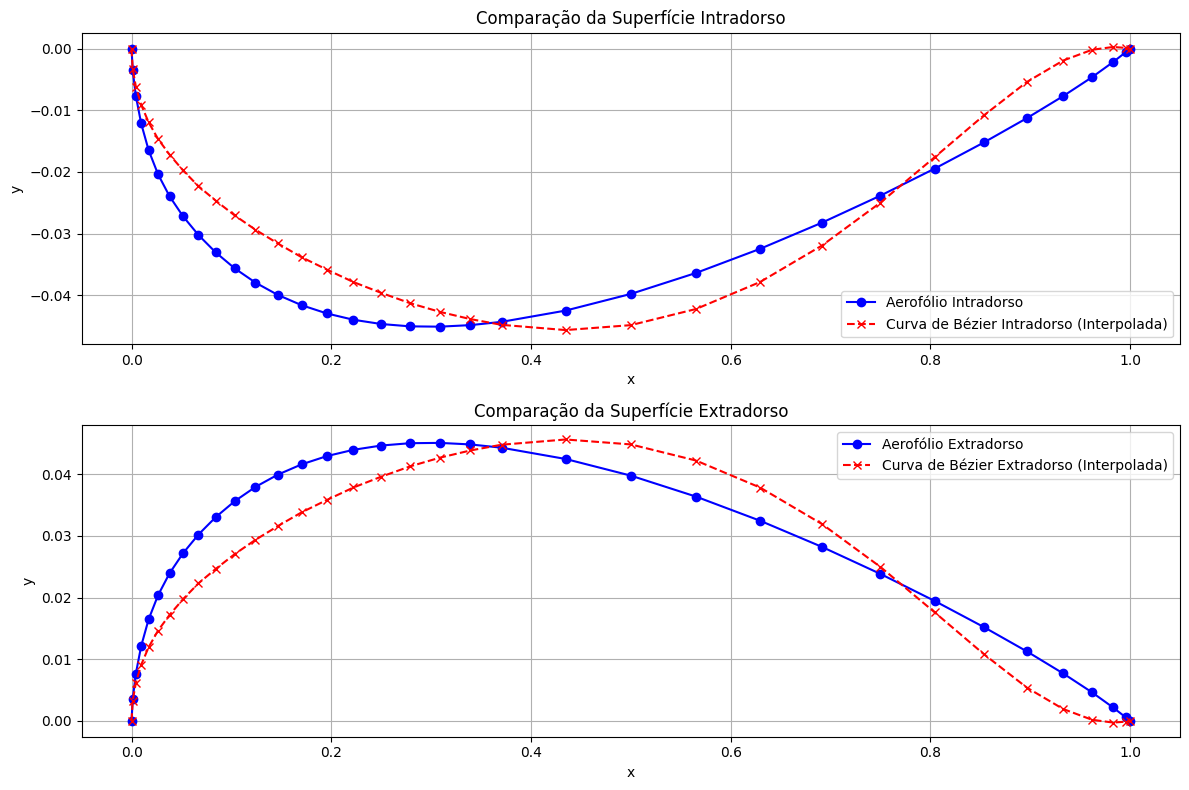

In [21]:
erro_intradorso, mse_intradorso, y_bezier_intradorso_interp = comparar_superficies(xinf, yinf, xBezierInf, yBezierInf)
erro_extradorso, mse_extradorso, y_bezier_extradorso_interp = comparar_superficies(xsup, ysup, xBezierSup, yBezierSup)
print("Erro Quadrático Médio (MSE) Intradorso:", mse_intradorso)
print("Erro Quadrático Médio (MSE) Extradorso:", mse_extradorso)

# Visualização das superfícies

plt.figure(figsize=(12, 8))

# Plotando a superfície intradorso
plt.subplot(2, 1, 1)
plt.plot(xinf, yinf, label='Aerofólio Intradorso', marker='o', linestyle='-', color='blue')
plt.plot(xinf, y_bezier_intradorso_interp, label='Curva de Bézier Intradorso (Interpolada)', marker='x', linestyle='--', color='red')
plt.title('Comparação da Superfície Intradorso')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Plotando a superfície extradorso
plt.subplot(2, 1, 2)
plt.plot(xsup, ysup, label='Aerofólio Extradorso', marker='o', linestyle='-', color='blue')
plt.plot(xsup, y_bezier_extradorso_interp, label='Curva de Bézier Extradorso (Interpolada)', marker='x', linestyle='--', color='red')
plt.title('Comparação da Superfície Extradorso')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

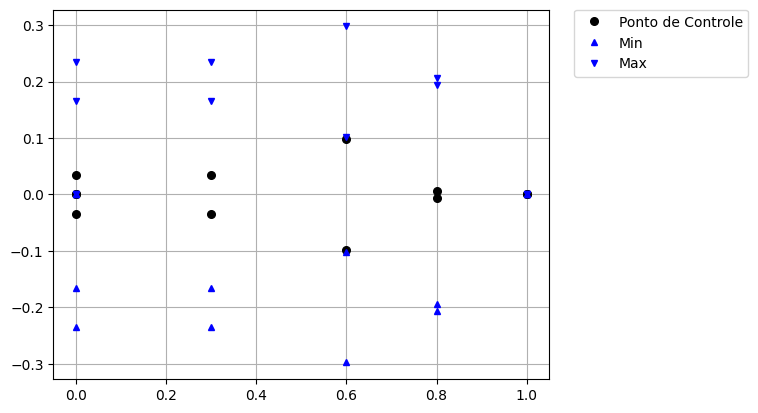

In [22]:
iterations = 2000; Qtind = 50
y_limits = np.concatenate((ysupB,yinfB))
Qvar = len(y_limits); RangeCP = 2
kmax = iterations//2; countFunc = 0; fbest = 0
pop =np.zeros((Qtind,Qvar) , dtype = 'float')
x =np.zeros((Qtind,Qvar) , dtype = 'float')
fpop =np.zeros(Qtind , dtype = 'float')
fsol =np.zeros(Qtind , dtype = 'float')
pbest =np.zeros(Qvar , dtype = 'float')
xmin =np.zeros(Qvar , dtype = 'float')
xmax =np.zeros(Qvar , dtype = 'float')
r =np.zeros(Qvar , dtype = 'float')
r1 =np.zeros(Qvar , dtype = 'float')
r2 =np.zeros(Qvar , dtype = 'float')
fHist = []

fixedValIdx = [0, len(ysupB)-1, len(ysupB), (len(ysupB)*2)-1]
xmin = y_limits.copy(); xmax = y_limits.copy()
variacao_minima = 0.4  # Mínimo de variação garantida
for i in range(len(y_limits)):
    if i not in fixedValIdx:
        if abs(RangeCP * y_limits[i]) < variacao_minima:  # Se a variação for pequena
            deslocamento = variacao_minima / 2
            xmin[i] = y_limits[i] - deslocamento
            xmax[i] = y_limits[i] + deslocamento
        else:
            xmin[i] = -y_limits[i] * RangeCP
            xmax[i] = y_limits[i] * 3 * RangeCP

plt.plot(xsupB,ysupB,'ko', markersize=5.5,label='Ponto de Controle')
plt.plot(xinfB,yinfB,'ko', markersize=5.5)
plt.plot(np.concatenate((xsupB,xinfB)),xmin,'b^', markersize=5,label='Min')
plt.plot(np.concatenate((xsupB,xinfB)),xmax,'bv', markersize=5,label='Max')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [23]:
import random

def cp_bezier_optimization(Qtind, iterations, airfoil, CP = 6, xsupB = [0.00, 0.00, 0.30, 0.60, 0.80, 1.0],
                           xinfB = [0.00, 0.00, 0.30, 0.60, 0.80, 1.0]):

    def obj_func(pop, xsupB, xinfB, airfoil, countFunc):

        ysupB = pop[:CP]
        yinfB = pop[CP:]

        xBezierSup, yBezierSup, xBezierInf, yBezierInf = Bezier2Coord(xsupB,ysupB,xinfB,yinfB,nPts = int(np.ceil(len(airfoil.x)/2)), dist='Cossine')

        # Comparando superfícies intradorso
        erro_intradorso, mse_intradorso, y_bezier_intradorso_interp = comparar_superficies(xinf, yinf, xBezierInf, yBezierInf)

        # Comparando superfícies extradorso
        erro_extradorso, mse_extradorso, y_bezier_extradorso_interp = comparar_superficies(xsup, ysup, xBezierSup, yBezierSup)

        # Calcula a média dos erros
        mean_error = (mse_intradorso + mse_extradorso) / 2
        
        # Penaliza a diferença entre os erros intradorso e extradorso
        error_difference = abs(mse_intradorso - mse_extradorso)

        # A penalização pode ser uma função da diferença, por exemplo, adicionando um fator multiplicativo
        penalty_factor = 1 + error_difference * 0.1  # Esse fator pode ser ajustado conforme necessário

        # Aplica a penalização
        output = mean_error * penalty_factor

        countFunc += 1

        return output,countFunc

    xsupB,ysupB,xinfB,yinfB = Coord2Bezier(airfoil,CP)
    #xsupB = list(np.insert(np.linspace(0, 1, CP-1), 0, 0))
    #xinfB = list(np.insert(np.linspace(0, 1, CP-1), 0, 0))
    xsupB = [0.00, 0.00, 0.30, 0.60, 0.80, 1.0]
    xinfB = [0.00, 0.00, 0.30, 0.60, 0.80, 1.0]

    y_limits = np.concatenate((ysupB,yinfB))
    Qvar = len(y_limits); RangeCP = 2
    kmax = iterations//2; countFunc = 0; fbest = 0
    pop =np.zeros((Qtind,Qvar) , dtype = 'float')
    x =np.zeros((Qtind,Qvar) , dtype = 'float')
    fpop =np.zeros(Qtind , dtype = 'float')
    fsol =np.zeros(Qtind , dtype = 'float')
    pbest =np.zeros(Qvar , dtype = 'float')
    xmin =np.zeros(Qvar , dtype = 'float')
    xmax =np.zeros(Qvar , dtype = 'float')
    r =np.zeros(Qvar , dtype = 'float')
    r1 =np.zeros(Qvar , dtype = 'float')
    r2 =np.zeros(Qvar , dtype = 'float')
    fHist = []

    fixedValIdx = [0, len(ysupB)-1, len(ysupB), (len(ysupB)*2)-1]
    xmin = y_limits.copy(); xmax = y_limits.copy()
    variacao_minima = 0.4  # Mínimo de variação garantida
    for i in range(len(y_limits)):
        if i not in fixedValIdx:
            if abs(RangeCP * y_limits[i]) < variacao_minima:  # Se a variação for pequena
                deslocamento = variacao_minima / 2
                xmin[i] = y_limits[i] - deslocamento
                xmax[i] = y_limits[i] + deslocamento
            else:
                xmin[i] = -y_limits[i] * RangeCP
                xmax[i] = y_limits[i] * 3 * RangeCP

    for i in range(0, Qtind):
        fpop[i] = 0
        while fpop[i] == 0:
            for j in range(0, Qvar):
                r[j] = random.random()
                pop[i,j] = xmin[j]+(1.-r[j])*(xmax[j]-xmin[j])
            fpop[i],countFunc = obj_func(pop[i,:], xsupB, xinfB, airfoil, countFunc)

    minlocobj=np.argmin(fpop)
    pbest[:]=pop[minlocobj,:]
    fbest=fpop[minlocobj]
    fHist.append(fbest)

    x=pop.copy()
    layout = "{0:.7f}"
    k=0
    while k<kmax:
        k += 1
        for i in range(0, Qtind):
            for j in range(0, Qvar):
                r1[j] = random.random()
                r2[j] = random.random()
                x[i,j] = x[i,j] + 2.*r1[j]*(pop[i,j]-x[i,j]) + 2.*r2[j]*(pbest[j]-x[i,j])
                x[i,j] = max(min(x[i,j],xmax[j]),xmin[j])

            #print (f'Calculating... Completed: {np.round(k/kmax*100,2)} %', end="\r")
            sys.stdout.write(f'\rPSO Progress: {round((k+1)/(iterations//2) * 100, 2)}% - Best Error: {fbest}')
            fsol[i],countFunc = obj_func(x[i,:], xsupB, xinfB, airfoil, countFunc)
            
        for i in range(0, Qtind):
            if ((fsol[i] < fpop[i]) and ((fsol[i]-fpop[i])/fpop[i] < 0.3)) :
                fpop[i]=fsol[i]
                pop[i,:]=x[i,:]

        minlocobj=np.argmin(fpop)
        pbest[:]=pop[minlocobj,:]
        fbest=fpop[minlocobj]
        fHist.append(fbest)

    ysupB = pbest[:6]; yinfB = pbest[6:]
    CR = 0.5; F = 0.8 #[0,2]
    niter_max = iterations//2; countFunc = 0
    pop_new = np.zeros((Qtind,Qvar) , dtype = 'float')
    delta   = np.zeros(2 , dtype = 'float')
    r       = np.zeros(Qvar , dtype = 'float')
    fixedValIdx = [0, len(ysupB)-1, len(ysupB), (len(ysupB)*2)-1]
    xmin = y_limits.copy(); xmax = y_limits.copy()

    for i in np.arange(0, len(y_limits)):
        if i not in fixedValIdx:
            xmin[i] = y_limits[i]*(1-RangeCP) if y_limits[i] >=0 else y_limits[i]*(1+RangeCP)
            xmax[i] = y_limits[i]*(1+RangeCP) if y_limits[i] >=0 else y_limits[i]*(1-RangeCP)

    pop_new=pop.copy(); niter=0
    while niter<niter_max:
        niter += 1
        for i in range(0,Qtind):
            alpha = random.randrange(Qtind)
            while (alpha==i) : alpha = random.randrange(Qtind)
            beta = random.randrange(Qtind)
            while (beta==i and beta==alpha): beta = random.randrange(Qtind)
            gamma = random.randrange(Qtind)
            while (gamma==i and gamma==alpha and gamma==beta): gamma = random.randrange(Qtind)
            r = random.random()
            if r<CR:
                delta[0] = 0; delta[1] = 1
            else:
                delta[0] = 1; delta[1] = 0

            for j in range(0, Qvar):
                pop_new[i,j] = delta[0]*pop[i,j]+delta[1]*(pop[alpha,j]+F*(pop[beta,j]-pop[gamma,j]))
                pop_new[i,j] = max(min(pop_new[i,j],xmax[j]),xmin[j])
            #print (f'Calculating... Completed: {np.round(niter/niter_max*100,2)} %', end="\r")
            sys.stdout.write(f'\rED Progress: {round((niter+1)/(iterations//2) * 100, 2)}% - Best Error: {fbest}')
            fsol,countFunc = obj_func(pop_new[i,:], xsupB, xinfB, airfoil, countFunc)
            
            if ((fsol < fpop[i]) and ((fsol-fpop[i])/fpop[i] < 0.3)):
                fpop[i]=fsol
                pop[i,:]=pop_new[i,:]
        maxlocobj=np.argmin(fpop)
        pbest[:]=pop[maxlocobj,:]
        fbest=fpop[maxlocobj]
        fHist.append(fbest)
        
    sys.stdout.write(f'\rOptimization Done! \n')   
    return pbest, fbest

In [24]:
Qtind = 100; iterations = 2000
pbest, fbest = cp_bezier_optimization(Qtind, iterations, airfoil)

Optimization Done!  - Best Error: 4.12735911611781e-0808


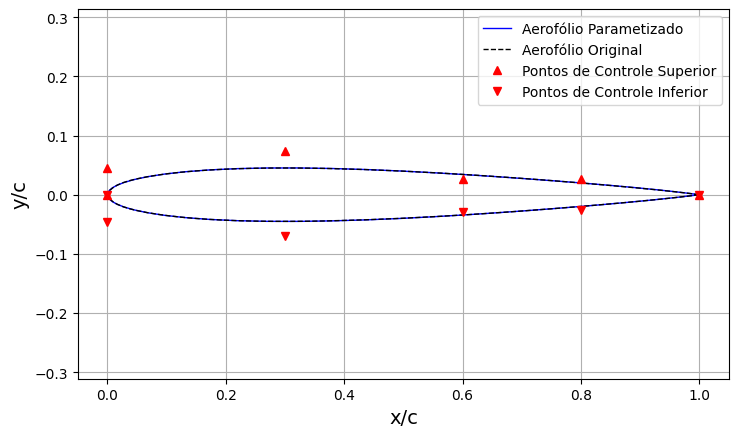

In [25]:
ysupB = pbest[:CP]; yinfB = pbest[CP:]
xsupB = list(np.insert(np.linspace(0, 1, CP-1), 0, 0))
xinfB = list(np.insert(np.linspace(0, 1, CP-1), 0, 0))
xsupB = [0.00, 0.00, 0.30, 0.60, 0.80, 1.0]
xinfB = [0.00, 0.00, 0.30, 0.60, 0.80, 1.0]
xBezierSup, yBezierSup, xBezierInf, yBezierInf = Bezier2Coord(xsupB,ysupB,xinfB,yinfB,nPts = int(np.ceil(len(airfoil.x)/2)), dist='Cossine')

plt.figure(figsize=(8.4, 4.8))
plt.plot(xBezierSup,yBezierSup,'b-', label='Aerofólio Parametizado', linewidth=1)
plt.plot(xBezierInf,yBezierInf,'b-', linewidth=1)
plt.plot(airfoil.x, airfoil.y, 'k--', label='Aerofólio Original', linewidth=1)
plt.plot(xsupB,ysupB,'r^',label='Pontos de Controle Superior', linewidth=3)
plt.plot(xinfB,yinfB,'rv',label='Pontos de Controle Inferior', linewidth=3)
#Plot settings
font = {'size': 14}
plt.axis('equal')
plt.grid('minor')
plt.ylabel('y/c', fontdict=font)
plt.xlabel("x/c", fontdict=font)
plt.legend()
plt.show()

Erro Quadrático Médio (MSE) Intradorso: 4.153870210215561e-08
Erro Quadrático Médio (MSE) Extradorso: 4.100848021582376e-08


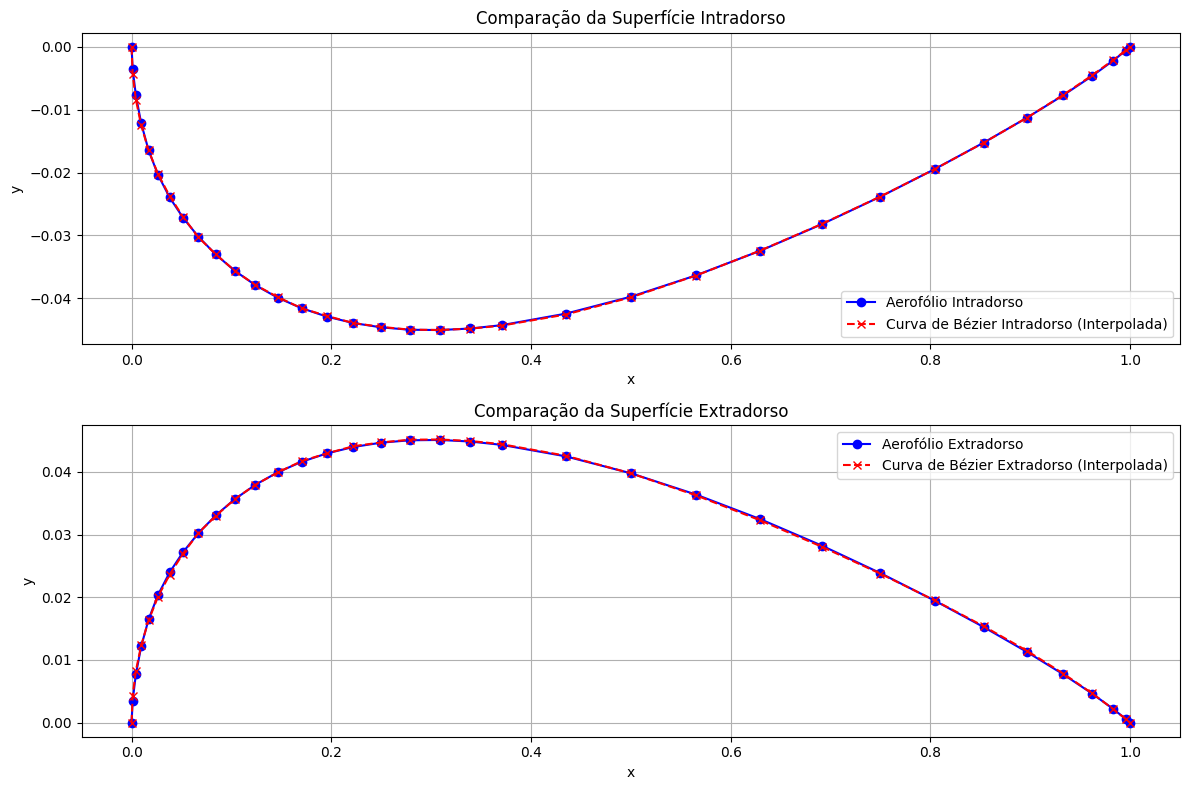

In [26]:
erro_intradorso, mse_intradorso, y_bezier_intradorso_interp = comparar_superficies(xinf, yinf, xBezierInf, yBezierInf)
erro_extradorso, mse_extradorso, y_bezier_extradorso_interp = comparar_superficies(xsup, ysup, xBezierSup, yBezierSup)
print("Erro Quadrático Médio (MSE) Intradorso:", mse_intradorso)
print("Erro Quadrático Médio (MSE) Extradorso:", mse_extradorso)

# Visualização das superfícies

plt.figure(figsize=(12, 8))

# Plotando a superfície intradorso
plt.subplot(2, 1, 1)
plt.plot(xinf, yinf, label='Aerofólio Intradorso', marker='o', linestyle='-', color='blue')
plt.plot(xinf, y_bezier_intradorso_interp, label='Curva de Bézier Intradorso (Interpolada)', marker='x', linestyle='--', color='red')
plt.title('Comparação da Superfície Intradorso')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Plotando a superfície extradorso
plt.subplot(2, 1, 2)
plt.plot(xsup, ysup, label='Aerofólio Extradorso', marker='o', linestyle='-', color='blue')
plt.plot(xsup, y_bezier_extradorso_interp, label='Curva de Bézier Extradorso (Interpolada)', marker='x', linestyle='--', color='red')
plt.title('Comparação da Superfície Extradorso')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

---

In [28]:
df_cp = pd.DataFrame(columns=['CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CP7', 'CP8', 'CP9', 'CP10', 'CP11', 'CP12', 'airfoil'])
count = 1
pasta_coordenadas = 'airfoils_coords//'
for nome_arquivo in final_df.airfoil.unique():
    Qtind = 100; iterations = 3000
    print(f'\nAirfoil {nome_arquivo} - {count}/{len(final_df.airfoil.unique())}')
    filename = pasta_coordenadas+nome_arquivo+'.dat' #enter your file path here
    airfoil = pd.read_table(filename,delim_whitespace=True,skiprows=[0],names=['x','y'],index_col=False)
    pbest, fbest = cp_bezier_optimization(Qtind, iterations, airfoil)
    nome_aerofolio = nome_arquivo.split('.')[0]

    nova_linha = pd.DataFrame([list(pbest) + [nome_aerofolio]], columns=df_cp.columns)
    df_cp = pd.concat([df_cp, nova_linha], ignore_index=True)
    count+=1


Airfoil naca1410 - 1/40
Optimization Done! % - Best Error: 1.1647743711228134e-077

Airfoil naca2410 - 2/40
Optimization Done! % - Best Error: 1.2221125017376139e-077

Airfoil naca4421 - 3/40
Optimization Done! % - Best Error: 4.0167875533187335e-077

Airfoil naca63209 - 4/40
Optimization Done! % - Best Error: 3.7067416096243176e-08

Airfoil naca632015 - 5/40
Optimization Done! % - Best Error: 3.611975185123954e-0808

Airfoil naca2412 - 6/40
Optimization Done! % - Best Error: 1.6060698729543973e-077

Airfoil naca631212 - 7/40
Optimization Done! % - Best Error: 3.6229245990533664e-08

Airfoil naca631012 - 8/40
Optimization Done! % - Best Error: 3.735951523732715e-088

Airfoil naca63006 - 9/40
Optimization Done! % - Best Error: 2.397552111775792e-055

Airfoil naca1408 - 10/40
Optimization Done! % - Best Error: 8.686306850073578e-088

Airfoil naca4412 - 11/40
Optimization Done! % - Best Error: 1.7828903400751547e-077

Airfoil naca001034a08 - 12/40
Optimization Done! % - Best Error: 1.165

In [47]:
# Mudando o nome da coluna 'Cl' para 'Coef_Cl'
df_cp = df_cp.rename(columns={'Nome_Aerofolio': 'airfoil'})

# Mostrando o DataFrame atualizado
df_cp.head()

,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9,CP10,CP11,CP12,airfoil
0,0.0,0.047741,0.068567,0.032866,0.022769,0.00105,0.0,-0.048052,-0.067747,-0.033760,-0.022406,-0.00105,naca1410
1,0.0,0.048323,0.066904,0.034801,0.021958,0.00105,0.0,-0.048767,-0.065687,-0.035924,-0.021600,-0.00105,naca2410
2,0.0,0.048459,0.065880,0.037212,0.019397,0.00220,0.0,-0.048731,-0.065159,-0.037996,-0.019075,-0.00220,naca4421
3,0.0,0.045590,0.072670,0.027616,0.026097,0.00000,0.0,-0.046177,-0.071132,-0.029246,-0.025493,0.00000,naca63209
4,0.0,0.046077,0.071395,0.029000,0.025556,0.00000,0.0,-0.045907,-0.071881,-0.028422,-0.025824,0.00000,naca632015


In [48]:
df_combined = pd.merge(df_cp, final_df, on='airfoil', how='left')
df_combined.head()

,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9,CP10,CP11,CP12,airfoil,Cl,Cd,Alpha,Re
0,0.0,0.047741,0.068567,0.032866,0.022769,0.00105,0.0,-0.048052,-0.067747,-0.03376,-0.022406,-0.00105,naca1410,-1.121109,0.015669,-9.804158,3000000
1,0.0,0.047741,0.068567,0.032866,0.022769,0.00105,0.0,-0.048052,-0.067747,-0.03376,-0.022406,-0.00105,naca1410,-1.092091,0.015091,-9.804158,3000000
2,0.0,0.047741,0.068567,0.032866,0.022769,0.00105,0.0,-0.048052,-0.067747,-0.03376,-0.022406,-0.00105,naca1410,-1.080654,0.014569,-9.804158,3000000
3,0.0,0.047741,0.068567,0.032866,0.022769,0.00105,0.0,-0.048052,-0.067747,-0.03376,-0.022406,-0.00105,naca1410,-1.057541,0.013933,-9.804158,3000000
4,0.0,0.047741,0.068567,0.032866,0.022769,0.00105,0.0,-0.048052,-0.067747,-0.03376,-0.022406,-0.00105,naca1410,-1.028489,0.013412,-9.804158,3000000


In [49]:
df_combined.to_csv('dataframe.csv', index=False)

---